In [48]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers

In [59]:
(train_data, train_targets), (test_data, test_targets)=boston_housing.load_data()

In [60]:
train_data.shape

(404, 13)

In [61]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [62]:
train_targets[1]

42.3

#normalizacion

In [63]:
mean=train_data.mean(axis=0)
train_data=train_data-mean
std=train_data.std(axis=0)
train_data=train_data/std

test_data=test_data-mean
test_data=test_data/std
#

In [64]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
    return model

In [65]:
#entrenar sobre el set de validacion, en la data de entrenamiento
k = 4
num_val_samples = len(train_data) // 4
num_epoch = 80
all_history = []

In [66]:
0*num_val_samples

0

In [67]:
#entrenamiento del modelo de regresion
(0+1) * num_val_samples

101

In [68]:
for i in range(k):
    print("Fold " , i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0
    )

    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0
    )
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16,
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])

Fold  0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold  1
Fold  2
Fold  3


In [69]:
len(all_history[0])

80

In [71]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

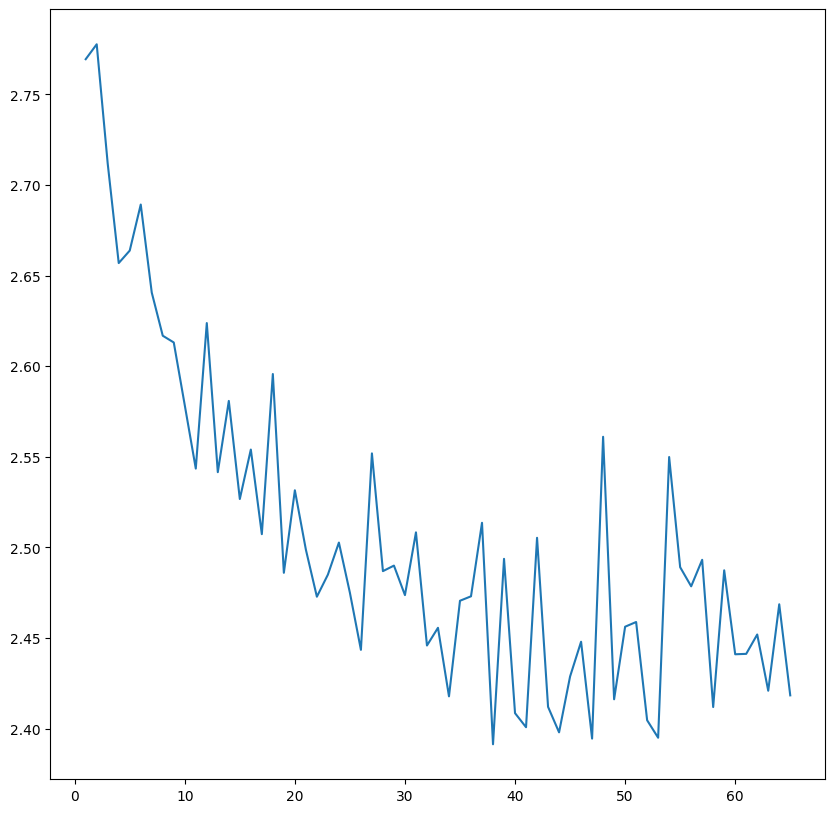

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [73]:
model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.9933 - mae: 2.6353


[21.08820152282715, 2.891836643218994]